In [92]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import math

In [2]:
PICKLE_PATH = 'dblp_jr_df.pickle'
jr_dblp_df = pd.read_pickle(PICKLE_PATH)

In [3]:
import gc
gc.collect()

0

In [4]:
jr_dblp_df['SJR'] = jr_dblp_df['SJR'].astype(str).str.replace(',', '.') 

In [5]:
jr_dblp_df['SJR'] = pd.to_numeric(jr_dblp_df['SJR'], errors='coerce')

In [6]:
jr_dblp_df.drop(columns=['__id_left', '__id_right'], inplace=True)

In [7]:
jr_dblp_df.isna().sum()

best_match_score           529939
abstract                   530475
authors                         4
id                              0
n_citation                      0
references                 362865
title                           0
venue                           0
year                            0
Rank                       529939
Sourceid                   529939
Title                      529939
Type                       529939
Issn                       529939
SJR                        529939
SJR Best Quartile          529939
H index                    529939
Total Docs. (2017)         529939
Total Docs. (3years)       529939
Total Refs.                529939
Total Cites (3years)       529939
Citable Docs. (3years)     529939
Cites / Doc. (2years)      529939
Ref. / Doc.                529939
Country                    529939
Publisher                 1552746
Categories                 529939
dtype: int64

In [8]:
jr_dblp_df = jr_dblp_df.dropna(subset=['authors'])
jr_dblp_df['references'].fillna('[]', inplace=True)
jr_dblp_df['abstract'].fillna('', inplace=True)

In [9]:
jr_dblp_df['best_match_score'].fillna(0, inplace=True)
jr_dblp_df['Title'].fillna('NoMatch', inplace=True)
jr_dblp_df['Sourceid'].fillna('NoMatch', inplace=True)
jr_dblp_df['Rank'].fillna(sys.maxsize, inplace=True)

In [10]:
jr_dblp_df['Type'].fillna('NoMatch', inplace=True)
jr_dblp_df['Issn'].fillna('NoMatch', inplace=True)
jr_dblp_df['SJR'].fillna(0, inplace=True)
jr_dblp_df['SJR Best Quartile'].fillna('NoMatch', inplace=True)
jr_dblp_df['H index'].fillna(0, inplace=True)

In [11]:
jr_dblp_df['Total Docs. (2017)'].fillna(0, inplace=True)
jr_dblp_df['Total Docs. (3years)'].fillna(0, inplace=True)
jr_dblp_df['Total Cites (3years)'].fillna(0, inplace=True)
jr_dblp_df['Citable Docs. (3years)'].fillna(0, inplace=True)
jr_dblp_df['Ref. / Doc.'].fillna(0, inplace=True)
jr_dblp_df['Country'].fillna('NoMatch', inplace=True)
jr_dblp_df['Publisher'].fillna('NoMatch', inplace=True)

In [12]:
jr_dblp_df['Total Refs.'].fillna(0, inplace=True)
jr_dblp_df['Cites / Doc. (2years)'].fillna(0, inplace=True)

In [13]:
jr_dblp_df.isna().sum()

best_match_score               0
abstract                       0
authors                        0
id                             0
n_citation                     0
references                     0
title                          0
venue                          0
year                           0
Rank                           0
Sourceid                       0
Title                          0
Type                           0
Issn                           0
SJR                            0
SJR Best Quartile              0
H index                        0
Total Docs. (2017)             0
Total Docs. (3years)           0
Total Refs.                    0
Total Cites (3years)           0
Citable Docs. (3years)         0
Cites / Doc. (2years)          0
Ref. / Doc.                    0
Country                        0
Publisher                      0
Categories                529939
dtype: int64

In [14]:
reach_df = pd.read_pickle('final_pickles/reach_df_10.pickle')

In [15]:
jr_dblp_merged_df = jr_dblp_df.join(reach_df.set_index('id'), on='id', lsuffix='_l', rsuffix='_r')

### NaN reach is replaced 

In [16]:
jr_dblp_merged_df.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Categories,reach,h,n
0,0.205271,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,2.020000e+03,...,20.0,28.0,"0,00","0,00",United States,NoMatch,Computer Networks and Communications,NaN,NaN,NaN
7,0.530366,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,1.704000e+03,...,105.0,107.0,"0,98","0,00",United States,NoMatch,Computer Science Applications; Computer Vision...,0.0,1.0,2.0
10,0.483278,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,4.600000e+01,...,7351.0,575.0,"11,38","29,34",United States,Institute of Electrical and Electronics Engineers,Applied Mathematics (Q1); Artificial Intellige...,4.0,2.0,7.0
20,0.000000,,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",00338203-9eb3-40c5-9f31-cbac73a519ec,0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,9.223372e+18,...,0.0,0.0,0,0,NoMatch,NoMatch,NaN,NaN,NaN,NaN
21,0.000000,,"[Giovanna Guerrini, Isabella Merlo]",0040b022-1472-4f70-a753-74832df65266,2,[],Reasonig about Set-Oriented Methods in Object ...,,1998,9.223372e+18,...,0.0,0.0,0,0,NoMatch,NoMatch,NaN,NaN,NaN,NaN


In [17]:
jr_dblp_merged_df['reach'].fillna(0, inplace=True)
jr_dblp_merged_df['h'].fillna(0, inplace=True)
jr_dblp_merged_df['n'].fillna(0, inplace=True)

In [18]:
jr_dblp_merged_df.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Categories,reach,h,n
0,0.205271,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,2.020000e+03,...,20.0,28.0,"0,00","0,00",United States,NoMatch,Computer Networks and Communications,0.0,0.0,0.0
7,0.530366,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,1.704000e+03,...,105.0,107.0,"0,98","0,00",United States,NoMatch,Computer Science Applications; Computer Vision...,0.0,1.0,2.0
10,0.483278,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,4.600000e+01,...,7351.0,575.0,"11,38","29,34",United States,Institute of Electrical and Electronics Engineers,Applied Mathematics (Q1); Artificial Intellige...,4.0,2.0,7.0
20,0.000000,,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",00338203-9eb3-40c5-9f31-cbac73a519ec,0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011,9.223372e+18,...,0.0,0.0,0,0,NoMatch,NoMatch,NaN,0.0,0.0,0.0
21,0.000000,,"[Giovanna Guerrini, Isabella Merlo]",0040b022-1472-4f70-a753-74832df65266,2,[],Reasonig about Set-Oriented Methods in Object ...,,1998,9.223372e+18,...,0.0,0.0,0,0,NoMatch,NoMatch,NaN,0.0,0.0,0.0


In [19]:
dblp_df_with_citation_score = pd.read_pickle('dblp_df_with_citation_score.pickle')

In [20]:
dblp_df_with_citation_score = dblp_df_with_citation_score[['id', 'num_authors', 'num_ref', 'abstract_len', 'title_len',
       'max_year_citations', 'total_year_citations', 'citation_score',
       'normalized_citation_score']]

In [21]:
dblp_final = jr_dblp_merged_df.join(dblp_df_with_citation_score.set_index('id'), on='id', lsuffix='_l', rsuffix='_r')

In [22]:
dblp_final.sort_values(by='normalized_citation_score', inplace=True)

In [23]:
dblp_final.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,h,n,num_authors,num_ref,abstract_len,title_len,max_year_citations,total_year_citations,citation_score,normalized_citation_score
0,0.205271,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,2020.0,...,0.0,0.0,8,2,379,159,7441,5109811,0.0,0.0
3089056,0.312277,This paper addresses the problem of finding sa...,"[Danny Dolev, José Meseguer, Marshall C. Pease]",edbf68cd-b828-4e8a-a7f5-2c0ad9fc54aa,0,"[3fb43b00-905c-4a08-934d-198ea4eb66c3, 532a17e...",Finding safe paths in a faulty environment,principles of distributed computing,1982,665.0,...,0.0,0.0,3,9,628,42,8842,273515,0.0,0.0
3089085,0.463659,On mining quantitative association rules and t...,"[Lanfang Lou, Jianhai Hou, Qingxian Pan, Lihon...",edc009a5-b6dd-4eb5-af24-d725eaee4595,0,"[010793c8-fedb-49ee-88bc-1e20f8bae870, 34b7e27...",Application of cluster in quantitative associa...,fuzzy systems and knowledge discovery,2010,4178.0,...,0.0,0.0,4,3,362,63,11580,5963407,0.0,0.0
3089380,0.039488,Abstract A construction of caps is given whi...,"[Hans-Joachim Kroll, Rita Vincenti]",edc071ae-26bd-4b49-bfa4-63e0b3943f16,0,[],On a Construction of Caps,Electronic Notes in Discrete Mathematics,2006,1256.0,...,0.0,0.0,2,0,320,25,20915,5696239,0.0,0.0
3089451,0.117550,IT-Projekte verfugen uber eine hohe strategisc...,"[Martin Wiener, Reinhard Denk]",edc0cf83-2570-4ca9-b51f-d4fde2ec6e71,0,"[4d636b47-cc92-46ff-9eb9-5e8bf023494b, 4ee8eb0...",Governance von globalen IT-Projekten — eine dy...,Praxis Der Wirtschaftsinformatik,2012,387.0,...,0.0,0.0,2,4,675,74,22884,5502318,0.0,0.0


In [24]:
dblp_final.SJR.max()

13.802

In [25]:
dblp_final['SJR_Normalized'] = dblp_final.SJR/dblp_final.SJR.max()

In [26]:
dblp_final.head()

,best_match_score,abstract,authors,id,n_citation,references,title,venue,year,Rank,...,n,num_authors,num_ref,abstract_len,title_len,max_year_citations,total_year_citations,citation_score,normalized_citation_score,SJR_Normalized
0,0.205271,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,2020.0,...,0.0,8,2,379,159,7441,5109811,0.0,0.0,0.014418
3089056,0.312277,This paper addresses the problem of finding sa...,"[Danny Dolev, José Meseguer, Marshall C. Pease]",edbf68cd-b828-4e8a-a7f5-2c0ad9fc54aa,0,"[3fb43b00-905c-4a08-934d-198ea4eb66c3, 532a17e...",Finding safe paths in a faulty environment,principles of distributed computing,1982,665.0,...,0.0,3,9,628,42,8842,273515,0.0,0.0,0.034705
3089085,0.463659,On mining quantitative association rules and t...,"[Lanfang Lou, Jianhai Hou, Qingxian Pan, Lihon...",edc009a5-b6dd-4eb5-af24-d725eaee4595,0,"[010793c8-fedb-49ee-88bc-1e20f8bae870, 34b7e27...",Application of cluster in quantitative associa...,fuzzy systems and knowledge discovery,2010,4178.0,...,0.0,4,3,362,63,11580,5963407,0.0,0.0,0.008984
3089380,0.039488,Abstract A construction of caps is given whi...,"[Hans-Joachim Kroll, Rita Vincenti]",edc071ae-26bd-4b49-bfa4-63e0b3943f16,0,[],On a Construction of Caps,Electronic Notes in Discrete Mathematics,2006,1256.0,...,0.0,2,0,320,25,20915,5696239,0.0,0.0,0.020794
3089451,0.117550,IT-Projekte verfugen uber eine hohe strategisc...,"[Martin Wiener, Reinhard Denk]",edc0cf83-2570-4ca9-b51f-d4fde2ec6e71,0,"[4d636b47-cc92-46ff-9eb9-5e8bf023494b, 4ee8eb0...",Governance von globalen IT-Projekten — eine dy...,Praxis Der Wirtschaftsinformatik,2012,387.0,...,0.0,2,4,675,74,22884,5502318,0.0,0.0,0.052021


In [27]:
dblp_final['SJR_Normalized'].describe()

count    3.079003e+06
mean     3.511164e-02
std      4.995113e-02
min      0.000000e+00
25%      8.694392e-03
50%      1.883785e-02
75%      4.296479e-02
max      1.000000e+00
Name: SJR_Normalized, dtype: float64

In [28]:
median_sjr = dblp_final['SJR_Normalized'].median()

In [29]:
dblp_final['SJR_Normalized'] = dblp_final['SJR_Normalized'].apply(lambda x: median_sjr if math.isclose(0.0, x) else x)

In [30]:
dblp_final['SJR_Normalized'].describe()

count    3.079003e+06
mean     3.886008e-02
std      4.783775e-02
min      7.245327e-03
25%      1.637444e-02
50%      1.883785e-02
75%      4.296479e-02
max      1.000000e+00
Name: SJR_Normalized, dtype: float64

In [31]:
dblp_final['reach'] = dblp_final['reach'].apply(lambda x: 1.0 if math.isclose(0.0, x) else x)

In [32]:
dblp_final['reach_normalized'] = dblp_final['reach']/(dblp_final['reach'].max())


In [33]:
normalized_citation_score_max = dblp_final['normalized_citation_score'].max()
dblp_final['normalized_citation_score_scaled'] = dblp_final['normalized_citation_score']/normalized_citation_score_max

In [34]:
# we are giving a lower weight SJR_Normalized score so that the model
# is not highly biased towards higher ranked journal
dblp_final['j-index'] = (0.01)*dblp_final['SJR_Normalized'] + (0.5)*dblp_final['normalized_citation_score_scaled']+dblp_final['reach_normalized']

In [35]:
dblp_final.sort_values(by='j-index', ascending=False, inplace=True)

In [36]:
dblp_final.columns

Index(['best_match_score', 'abstract', 'authors', 'id', 'n_citation',
       'references', 'title', 'venue', 'year', 'Rank', 'Sourceid', 'Title',
       'Type', 'Issn', 'SJR', 'SJR Best Quartile', 'H index',
       'Total Docs. (2017)', 'Total Docs. (3years)', 'Total Refs.',
       'Total Cites (3years)', 'Citable Docs. (3years)',
       'Cites / Doc. (2years)', 'Ref. / Doc.', 'Country', 'Publisher',
       'Categories', 'reach', 'h', 'n', 'num_authors', 'num_ref',
       'abstract_len', 'title_len', 'max_year_citations',
       'total_year_citations', 'citation_score', 'normalized_citation_score',
       'SJR_Normalized', 'reach_normalized',
       'normalized_citation_score_scaled', 'j-index'],
      dtype='object')

In [37]:
dblp_final.drop(columns=['abstract', 'references']).reset_index().head()

,index,best_match_score,authors,id,n_citation,title,venue,year,Rank,Sourceid,...,abstract_len,title_len,max_year_citations,total_year_citations,citation_score,normalized_citation_score,SJR_Normalized,reach_normalized,normalized_citation_score_scaled,j-index
0,8606705,0.000000,"[Alfred V. Aho, John E. Hopcroft]",a662a4e7-415e-417e-8a8f-fe085d7e487f,13227,The Design and Analysis of Computer Algorithms,,1974,9.223372e+18,NoMatch,...,574,46,13227,143121,1.000000,6.987095e-06,0.018838,1.000000,0.000447,1.000412
1,4125743,0.512331,[John Ross Quinlan],b49c1e2b-0cd0-4950-a724-00c698e5b49d,19320,Induction of Decision Trees,Machine Learning,1986,4.110000e+02,24775,...,629,27,20878,573614,0.925376,1.613238e-06,0.050355,0.666168,0.000103,0.666723
2,4997861,0.838176,"[Hiroshi Murase, Shree K. Nayar]",5ebbd1f5-dfe5-4eec-9883-b8b5efea366c,2736,Visual learning and recognition of 3-D objects...,International Journal of Computer Vision,1995,4.800000e+01,72242,...,1114,62,26114,2007232,0.104771,5.219695e-08,0.166715,0.656813,0.000003,0.658482
3,361770,1.436873,"[Kah Kay Sung, Tomaso Poggio]",d5e5a24d-f80e-4f1a-b48b-22403b653276,2234,Example-based learning for view-based human fa...,IEEE Transactions on Pattern Analysis and Mach...,1998,4.600000e+01,24254,...,740,58,19833,2711193,0.112641,4.154649e-08,0.171497,0.557087,0.000003,0.558803
4,1682934,0.491680,[Jim Gray],25b46064-0d14-4675-a8e7-ab20f1199e54,2727,Notes on Data Base Operating Systems,Advances in Computers,1978,1.948000e+03,23080,...,0,36,18861,192611,0.144584,7.506532e-07,0.014853,0.534529,0.000048,0.534702


In [55]:
display_df = dblp_final[['title', 'authors', 'venue', 'year', 'n_citation', 'SJR_Normalized',
                        'reach_normalized', 'normalized_citation_score_scaled','j-index']]

display_df = display_df.rename(columns={'reach_normalized':'reach_score', 
                                        'normalized_citation_score_scaled':'citation_score',
                                       'SJR_Normalized':'sjr_score'
                                       })
display_df = display_df.reset_index()
display_df = display_df.drop(columns=['index'])

In [56]:
display_df.head(10)

,title,authors,venue,year,n_citation,sjr_score,reach_score,citation_score,j-index
0,The Design and Analysis of Computer Algorithms,"[Alfred V. Aho, John E. Hopcroft]",,1974,13227,0.018838,1.000000e+00,0.000447,1.000412
1,Induction of Decision Trees,[John Ross Quinlan],Machine Learning,1986,19320,0.050355,6.661679e-01,0.000103,0.666723
2,Visual learning and recognition of 3-D objects...,"[Hiroshi Murase, Shree K. Nayar]",International Journal of Computer Vision,1995,2736,0.166715,6.568129e-01,0.000003,0.658482
3,Example-based learning for view-based human fa...,"[Kah Kay Sung, Tomaso Poggio]",IEEE Transactions on Pattern Analysis and Mach...,1998,2234,0.171497,5.570867e-01,0.000003,0.558803
4,Notes on Data Base Operating Systems,[Jim Gray],Advances in Computers,1978,2727,0.014853,5.345290e-01,0.000048,0.534702
5,Support-Vector Networks,"[Corinna Cortes, Vladimir Vapnik]",Machine Learning,1995,26114,0.050355,5.326541e-01,0.000032,0.533174
6,Implementing remote procedure calls,"[Andrew Birrell, Bruce Jay Nelson]",ACM Transactions on Computer Systems,1984,2838,0.104188,5.258613e-01,0.000033,0.526920
7,Probabilistic Reasoning in Intelligent Systems...,[Judea Pearl],,1988,6589,0.018838,5.204852e-01,0.000024,0.520686
8,On Quine's Axioms of Quantification,[George D. W. Berry],Journal of Symbolic Logic,1941,50,0.027605,1.686521e-13,1.000000,0.500276
9,The design and implementation of INGRES,"[Michael Stonebraker, Gerald Held, Eugene Wong...",ACM Transactions on Database Systems,1976,539,0.053760,4.983320e-01,0.000011,0.498875


In [117]:
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)

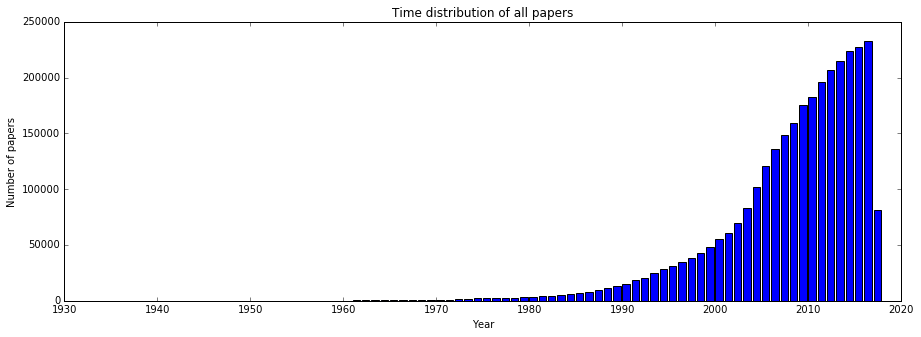

In [108]:
tot_j_index = display_df.groupby('year')['title'].count().reset_index()

fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.bar(tot_j_index['year'], tot_j_index['title'])
plt.title('Time distribution of all papers')
plt.xlabel('Year')
plt.ylabel('Number of papers')

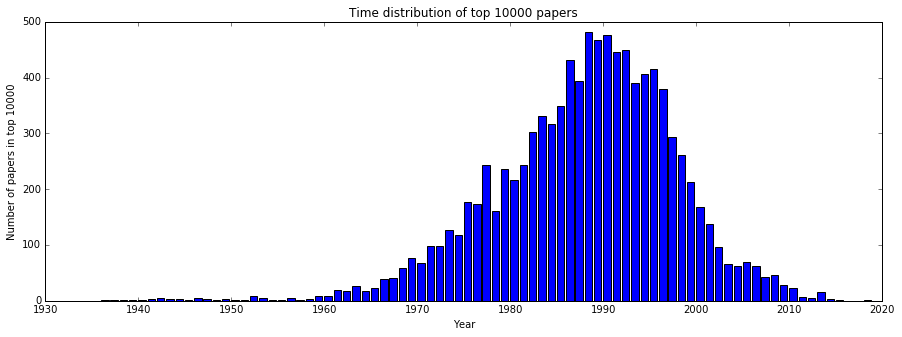

In [107]:
tot_j_index = display_df.head(10000).groupby('year')['title'].count().reset_index()

fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.bar(tot_j_index['year'], tot_j_index['title'])
plt.title('Time distribution of top 10000 papers')
plt.xlabel('Year')
plt.ylabel('Number of papers in top 10000')

In [112]:
correl = display_df[['sjr_score', 'reach_score', 'citation_score', 'j-index']].corr()

In [113]:
correl

,sjr_score,reach_score,citation_score,j-index
sjr_score,1.000000,0.022276,0.000571,0.166167
reach_score,0.022276,1.000000,0.001642,0.975747
citation_score,0.000571,0.001642,1.000000,0.166137
j-index,0.166167,0.975747,0.166137,1.000000


In [ ]:
snsheatmap(correl)

In [38]:
dblp_final.to_pickle('final_pickles/dblp_final_reach_10.pickle')

In [89]:
dblp_final['i-10'] = 'Azriel Rosenfeld' in list(dblp_final['authors'])

In [90]:
dblp_final['i-10'].sum()

0

In [45]:
MERGED_PICKLE_PATH = 'flattened_chunks_more_fields/ranked_authors_v2_merged.pickle'
dblp_flattened_auths_df = pd.read_pickle(MERGED_PICKLE_PATH)

###################

In [46]:
dblp_flattened_auths_df.head()

,year,normalized_citation_score_scaled,reach_normalized,id,j-index,normalized_citation_score,level_6,authors
0,2004,0.0,1.387352e-10,587dc146-67c6-410b-a105-dcf9d3a1138d,0.00043,0.0,0,Hajime Shibata
1,2004,0.0,1.387352e-10,587dc146-67c6-410b-a105-dcf9d3a1138d,0.00043,0.0,1,Adrian Stoica
2,2004,0.0,1.387352e-10,587dc146-67c6-410b-a105-dcf9d3a1138d,0.00043,0.0,2,Nobuo Fujii
3,2014,0.0,1.387352e-10,e59265e8-2e9a-4387-84ac-bda8d016b6d5,0.00043,0.0,0,Desislava Milenova Dechkova
4,2014,0.0,1.387352e-10,e59265e8-2e9a-4387-84ac-bda8d016b6d5,0.00043,0.0,1,Roani Miranda


In [49]:
dblp_final_categoris = dblp_final[['id', 'Categories']]

In [53]:
dblp_final_categoris['Categories'].fillna('[]', inplace=True)

/root/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [54]:
dblp_final_categoris.head()

,id,Categories
8606705,a662a4e7-415e-417e-8a8f-fe085d7e487f,[]
4125743,b49c1e2b-0cd0-4950-a724-00c698e5b49d,Software (Q1); Artificial Intelligence (Q2)
2161471,e75d8e62-a86d-4241-953f-1b315005d920,[]
244763,d3e00e7e-1c64-4d7a-b2b2-1ad98ba4c706,[]
4997861,5ebbd1f5-dfe5-4eec-9883-b8b5efea366c,Artificial Intelligence (Q1); Computer Vision ...


In [60]:
category_map = dict()

for idx, row in dblp_final_categoris.iterrows():
    temp = row['Categories'].split(';')
    temp = [x.split('(')[0].strip() for x in temp]
    category_map[row['id']] = set(temp)


In [61]:
import pickle
pickle.dump(category_map, open('category_map.pickle', 'wb'))